# Final Code

## Imports

In [79]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

## Import Data

In [80]:
rawData = pd.read_csv('default of credit card clients.csv', header=1)
classData = rawData

## Remove Unnecessary and Problematic Features

In [81]:
classData = classData.drop(['SEX', 'ID'], axis = 1)

## Remove Negative Balances on Bill Amount 6

In [82]:
classData = classData[classData['BILL_AMT6'] > 0]

## Dummify Marriage and Education

In [83]:
variables = ['MARRIAGE', 'EDUCATION']
for i in variables:
    dummy_df = pd.DataFrame(classData, columns=[i])
    dum_df = pd.get_dummies(dummy_df, columns=[i], prefix=[i + "_is"] )
    dummy_df = dummy_df.join(dum_df)
    classData = classData.drop([i], axis = 1)
    classData = classData.join(dummy_df)
    classData = classData.drop([i], axis = 1)

## Move Dependent Variable to Last Column

In [84]:
moveData = classData.drop(['default payment next month'], axis = 1)
default = classData['default payment next month']
moveData = moveData.join(default)
classData = moveData

## Define Features and Dependent Variable

In [85]:
depVar = classData['default payment next month']
features = classData.iloc[:,0:31]

## Define Test and Train Splits

In [50]:
from sklearn.model_selection import train_test_split
X = features
y = depVar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Import and Train Classifiers

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
treeModel = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
rfModel = RandomForestClassifier(max_depth=3, random_state=0, class_weight='balanced')
gbcModel = GradientBoostingClassifier(n_estimators=125, learning_rate=1.0,
        max_depth=2, random_state=0,)
clf = [treeModel, rfModel, gbcModel]
for i in clf:
    i.fit(X_train, y_train)

C:\Users\eidem\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Random Forest Model Score

In [52]:
rfModel.score(X_train, y_train)

0.8004744723965799

## Decision Tree Score

In [53]:
treeModel.score(X_train, y_train)

0.8293876340631642

## Gradient Boosting Classifier Score

In [54]:
gbcModel.score(X_train, y_train)

0.8463895616072753

## RF Validation Score

In [55]:
print(cross_val_score(rfModel, X_train, y_train)) 

C:\Users\eidem\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.8028169  0.80207561 0.79756785]


## GBC Validation Score

In [56]:
print(cross_val_score(gbcModel, X_train, y_train)) 

C:\Users\eidem\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.81408451 0.81037806 0.80542785]


## Tree Validation Score

In [57]:
print(cross_val_score(treeModel, X_train, y_train)) 

C:\Users\eidem\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.83439585 0.82653818 0.8241139 ]


## Predict Test Set With RF Model

In [20]:
from sklearn.metrics import classification_report
rfPredict = rfModel.predict(X_test)
rfReport = classification_report(rfPredict, y_test)
print(rfReport)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      3893
           1       0.58      0.56      0.57      1166

    accuracy                           0.80      5059
   macro avg       0.72      0.72      0.72      5059
weighted avg       0.80      0.80      0.80      5059



## GBC Predictions

In [61]:
from sklearn.metrics import classification_report
gbcPredict = gbcModel.predict(X_test)
gbcReport = classification_report(gbcPredict, y_test)
print(gbcReport)

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      4311
           1       0.41      0.63      0.50       748

    accuracy                           0.81      5059
   macro avg       0.67      0.74      0.69      5059
weighted avg       0.85      0.81      0.83      5059



## Tree Predictions

In [62]:
from sklearn.metrics import classification_report
treePredict = treeModel.predict(X_test)
treeReport = classification_report(treePredict, y_test)
print(gbcReport)

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      4311
           1       0.41      0.63      0.50       748

    accuracy                           0.81      5059
   macro avg       0.67      0.74      0.69      5059
weighted avg       0.85      0.81      0.83      5059



## Plot Feature Importances

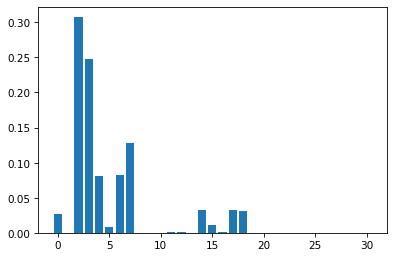

In [58]:
plt.rcParams['figure.dpi'] = 75
plt.bar(range(len(gbcModel.feature_importances_)), rfModel.feature_importances_)
plt.show()

In [64]:
feature_names = features.columns
feature_names

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'MARRIAGE_is_0', 'MARRIAGE_is_1',
       'MARRIAGE_is_2', 'MARRIAGE_is_3', 'EDUCATION_is_0', 'EDUCATION_is_1',
       'EDUCATION_is_2', 'EDUCATION_is_3', 'EDUCATION_is_4', 'EDUCATION_is_5',
       'EDUCATION_is_6'],
      dtype='object')

## Zoom in and Add Labels

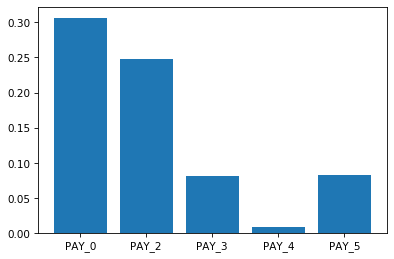

In [67]:
feature_names1 = features.columns[2:7]
feature_imp = rfModel.feature_importances_[2:7]
plt.bar(feature_names1, feature_imp)
plt.show()

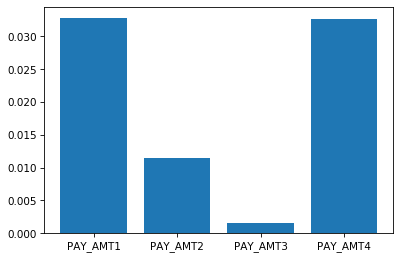

In [66]:
feature_names2 = features.columns[14:18]
feature_imp = rfModel.feature_importances_[14:18]
plt.bar(feature_names2, feature_imp)
plt.show()